# Project : Zomato API Question-2

Number of Votes given Restaurant

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import operator
import numpy as np
df = pd.read_csv('/Users/atharvjairath/Downloads/zomato.csv',encoding='latin-1')


1.Number of Votes given Restaurant

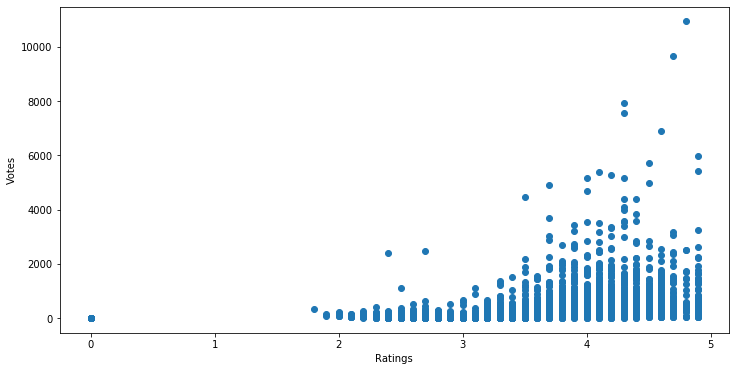

In [13]:
data=df.copy() #make copy of all data
ratings=data['Aggregate rating'] #Aggregate column
votes=data['Votes'] #Votes column
np_ratings=np.array(ratings) #np_array for np_ratings column 
np_votes=np.array(votes) #np_array for votes column
plt.subplots(figsize=(12,6)) #Declare size of graph
plt.scatter(np_ratings,np_votes) #scatter of graph
plt.xlabel('Ratings') #x_labels
plt.ylabel('Votes') #Y_labels
plt.show() #to show the graph

2. Restaurant serving more number of cuisines.

In [6]:
data=df.copy() #copy of all data
ratings=data['Aggregate rating']
total_cuisines={}
data.Cuisines.fillna('',inplace=True)

#calculations of the cuisines
def CalCuisine(cuisine):
    p=cuisine.split(',')
    return len(p)

data['Number_Cuisines']=data['Cuisines'].apply(CalCuisine)
data['Number_Cuisines'].value_counts()

2    3444
1    3403
3    1840
4     584
5     164
6      74
7      28
8      14
Name: Number_Cuisines, dtype: int64

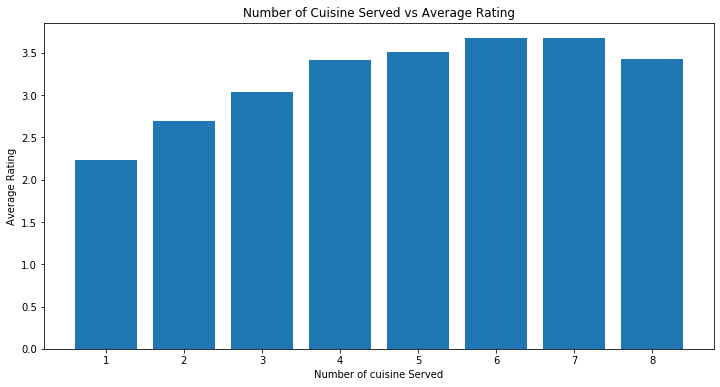

In [7]:
count_cuisine = [i for i in range(1,9)] #Using above data we came to know, Restaurant are serving only cuisenes between 1 ot 8
average_rating_cuisine = []
for i in count_cuisine:
    average_rating_cuisine.append(data[data['Number_Cuisines']==i]['Aggregate rating'].mean())#calculated the rating for each 
    #value between 1 ot 8 then calculated  mean of rating fo average ratings.
    
plt.subplots(figsize=(12,6))    
plt.bar(count_cuisine,average_rating_cuisine) 
plt.xlabel("Number of cuisine Served") 
plt.ylabel("Average Rating") 
plt.title("Number of Cuisine Served vs Average Rating")
plt.show() 

3. Average Cost of Restaurant

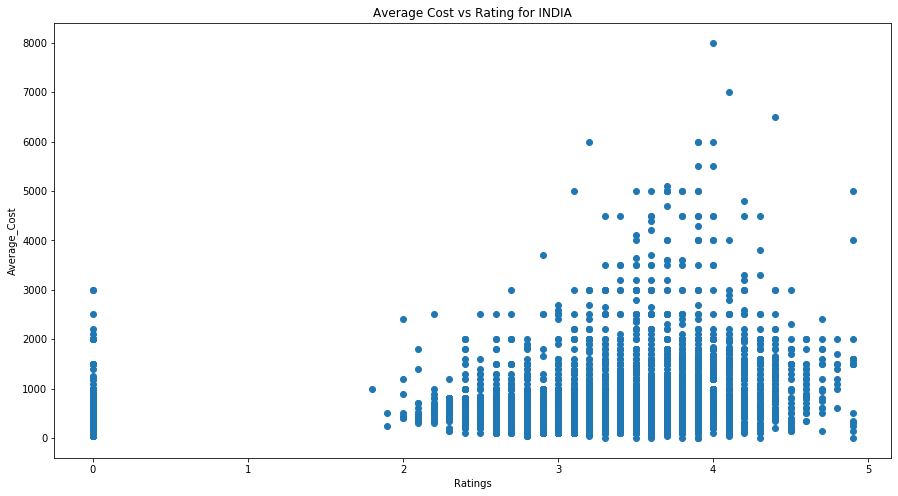

In [36]:
df=data[data['Country Code']==1] 
data=df.copy() 
ratings=data['Aggregate rating']
average_cost=data['Average Cost for two']
np_ratings=np.array(ratings)
np_average_cost=np.array(average_cost)
plt.subplots(figsize=(15,8))  
plt.scatter(np_ratings,np_average_cost,)
plt.xlabel('Ratings')
plt.ylabel('Average_Cost')
plt.title('Average Cost vs Rating for INDIA')
plt.show()

4. Restaurant serving some specific cuisines.

In [53]:
zomato_data = pd.read_csv('/Users/atharvjairath/Downloads/zomato.csv',encoding='latin-1')
zomato_data=zomato_data[zomato_data['Country Code']==1] 
zomato_data.dropna(inplace=True)
print('Lets take out average rating of  cuisines served in number of restaurant > 250 that present in our dataset')
cuisine_dict={}
for i in zomato_data['Cuisines'].values:
    cuisine_list=i.split(',')
    for j in cuisine_list:
        if j.strip() in cuisine_dict.keys():
            cuisine_dict[j.strip()]=cuisine_dict.get(j.strip())+1;
        else:
            cuisine_dict[j.strip()]=1

Lets take out average rating of  cuisines served in number of restaurant > 250 that present in our dataset


In [54]:
top_cuisine_10=pd.DataFrame(data=list(zip(list(cuisine_dict.keys()),list(cuisine_dict.values())))).sort_values(by=1,ascending=False)
y=top_cuisine_10[1].values
index=0
for j in range(len(y)):
    if y[j]<250:
        index=j-1
        break;
cuisine_list=top_cuisine_10[0].values[0:index]
print(cuisine_list)

['North Indian' 'Chinese' 'Fast Food' 'Mughlai' 'Bakery' 'Continental'
 'Italian' 'South Indian' 'Cafe' 'Desserts' 'Street Food' 'Mithai']


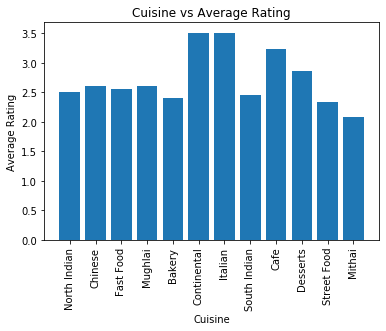

From above graph we can see restaturant serving Cuisine 'Italian','Continental','Cafe' have more average rating compared to other cuisine 


In [57]:
data=list(zip(zomato_data['Cuisines'],zomato_data['Aggregate rating']))
average_rating=[]
for cuisine in cuisine_list:
    sum=0;
    count=0
    for i in range(len(data)):
        if cuisine in data[i][0]:
            sum=sum+data[i][1]
            count=count+1
    average_rating.append(sum/count)     
plt.bar(cuisine_list,average_rating)
plt.xlabel("Cuisine")
plt.ylabel("Average Rating")
plt.xticks(rotation=90)
plt.title("Cuisine vs Average Rating")
plt.show()
print("From above graph we can see restaturant serving Cuisine 'Italian','Continental','Cafe' have more average rating compared to other cuisine ")

5. Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?

In [46]:
df['Aggregate_rating_Votes']=df['Aggregate rating']*df['Votes'] #making another column Aggregate_rating_Votes.
data=df.copy() 
locality=[]
Weighted_Restaurant_Rating=[]
top_10_locality=[]
top_10_weighted=[]
p=data.Locality.value_counts() 
new_index = p.index #making new index of p values.
for ele in new_index:
    d=data[data['Locality']==ele]
    total_result = d['Aggregate_rating_Votes'].sum()
    count= d['Votes'].sum()
    if count == 0: #if count zero then continue other wise total_result/count give error.
        continue
    weighted=total_result/count
    locality.append(ele)
    Weighted_Restaurant_Rating.append(weighted)
locality=locality[0:10] #top 10 localties
Weighted_Restaurant_Rating=Weighted_Restaurant_Rating[0:10] #top 10 weighted_restaurant_rating.



------------------------------------------------------------------
Connaught Place     | 3.85058739
Rajouri Garden      | 3.95026857
Shahdara            | 2.67698057
Defence Colony      | 3.75101936
Malviya Nagar       | 3.51786435
Pitampura           | 3.25551988
Mayur Vihar Phase 1 | 3.05184989
Rajinder Nagar      | 3.30493135
Safdarjung          | 3.86026932
Satyaniketan        | 3.98874711
------------------------------------------------------------------


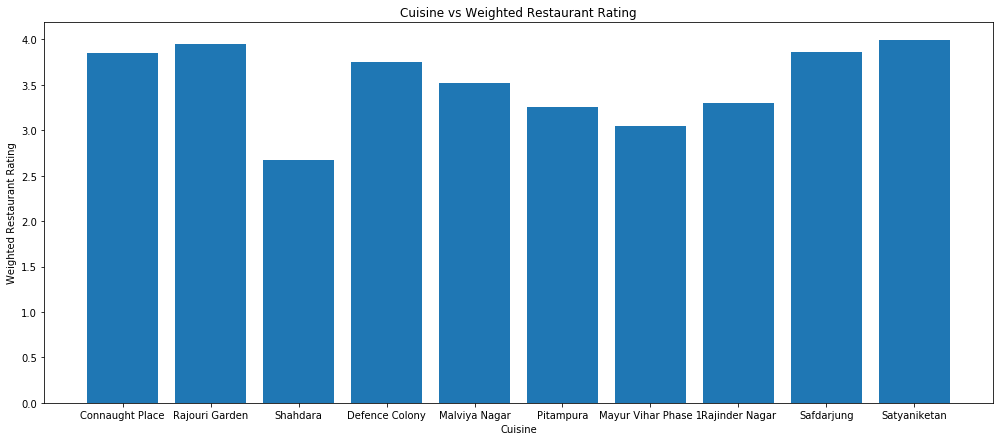

In [47]:
#printing Data
print("------------------------------------------------------------------")
for e1, e2 in zip(locality,Weighted_Restaurant_Rating):
    print('{:<20s}|{:>11.8f}'.format(e1,e2))
print("------------------------------------------------------------------")
#plotting of Graph    
plt.subplots(figsize=(17,7))    
plt.bar(locality,Weighted_Restaurant_Rating)
plt.xlabel("Cuisine")
plt.ylabel("Weighted Restaurant Rating")
plt.title("Cuisine vs Weighted Restaurant Rating")
plt.show()